# Backtest Overfitting

## Algorithm 2.3 (CSCV - Combinatorially symmetric cross-validation)

### Step 1 - form matrix M

Matrix $M$ has $N$ columns, which are the different strategies selected, to evaluate for potential overfit. We then have $t=1,2,...,T$ rows. Thus, you have performances of the $N$ strategies at different times. Keep in mind, that dates ($t=1,2,...,T$) have to be synchronised, i.e. if a performance measurement for strategy labelled $1$ is made on date $x$, then for all other strategies $2,3,4,...,N$ a measurement has to be made on the same date.

Assumption is made that performance measurements on $t=1,2,...,T$ are independent. Thus, you cannot just run $N$ strategies and take the performance measurements on different time-points because those would be autocorrelated. You can get away by defining "windows". For example, from $t=1$ to $t=2$ what was the starting equity and ending equity, and take a Sharpe, or annual-return. This will work. Though, in some special cases, where the strategy would have performed completely different (due to some kind of smoothing for example), this is not a feasible solution. And thus, one would be required to run independent $T$ backtests, for each of the $N$ strategies, to attempt and adhere to the independence assumption.

### Step 2 - Partition $M$ into $S$ disjoint submatrices

Note that $S$ should be even. You end up with $M_s$ matrices, that are $\mathbb{R}^{T/S \times N}$

### Step 3 - Form all combination of $M_s$

Form all $C_S$ combinations of $M_s$ matrices (taken in groups of $S/2$). So suppose that $M$ is something like the following:
$$M=
\begin{bmatrix}
    [ ---- M_1 ---- ] \\
    [ ---- M_2 ---- ] \\
    [ ---- M_3 ---- ] \\
    [ ---- M_4 ---- ]
\end{bmatrix}$$

Where $M \in \mathbb{R}^{T \times N}$ and each $M_s \in \mathbb{R}^{T/S \times N}$. Note that:

$$ {S \choose S/2} = \frac{(S-1)! S}{(S-S/2)!(S/2-1)! S/2} = {S-1 \choose S/2-1} \frac{S}{S/2} = ... = \prod_{i=0}^{S/2-1} \frac{S-i}{S/2-i} $$

And so according to the equation above, and to the example matrix, $S=4$, so the number of combinations is ${4 \choose 2 }= 6$, and these are:

$$C_4 = \{\{M_1,M_2\},\{M_1,M_3\},\{M_1,M_4\},\{M_2,M_3\},\{M_2,M_4\},\{M_3,M_4\}\}$$

Thus: $$|\{C_S\}| = {S \choose S/2}$$

### Step 4 

For each combination $c \in C_S$ (e.g.: $\{M_1,M_2\},\{M_1,M_3\},...)$:

a) Form $J$ (training set). 

If $c=\{M_1,M_2\}$, then 

$$J=
\begin{bmatrix}
    [ ---- M_1 ---- ] \\
    [ ---- M_2 ---- ] 
\end{bmatrix}$$

$J \in \mathbb{R}^{T/2 \times N}$

b) Form $\bar{J}$ (testing set).

If $c=\{M_1,M_2\}$, then

$$\bar{J}=
\begin{bmatrix}
    [ ---- M_3 ---- ] \\
    [ ---- M_4 ---- ] 
\end{bmatrix}$$

$\bar{J} \in \mathbb{R}^{T/2 \times N}$

Note that the order is preserved! For some performance measures, e.g. Sharpe, order is not important. But for drawdown, it certainly is.

c) Form vector $R^c$ (IS performance) 

(probably by stitching together the performance measures at different times? So take the sum of the Sharpe ratios?). Derive $r^c$.

d) Form vector $\bar{R}^c$ (OOS performance). 

Derive $\bar{r}^c$.

e) Determine the element $n^*$ such that $r^c_{n^*} \in \Omega^*_{n^*}$. 

In other words, if $r_c=(1,4,2,3)$ and thus, the best performing strategy is at index $2$, so $n^*=2$. This is becasue, for example $\Omega_3^*$ when $N=4$ is $\{f \in \Omega | f_3=4 \} = \{ (1,2,4,3),(2,1,4,3), (1,3,4,2), (3,1,4,2), ... \}$, i.e. third strategy is always the best

f) Define the relative rank of $r_{n^*}^c$ (i.e. relative rank of the best performing strategy IS in the OOS). 

$\bar{\omega_c} := \bar{r}^c_{n^*}/(N+1) \in (0,1)$

**If the strategy optimization procedure is not overfitting, we should observe that $r_{n^*}^c$ systematically outperforms OOS**

g) Define/compute the *logit* $\lambda_c = \ln{\frac{\bar{\omega_c}}{1-\bar{\omega_c}}}$.

**High logit values imply a consistency between IS and OOS performances, which indicates a low level of overfitting**

To summarize:

1) Form training set $J$

2) Form testing set $\bar{J}$

3) Form performances vector IS $R^c$, derive $r^c$

4) Form performances vector OOS $\bar{R}^c$, derive $\bar{r}^c$

5) Determine element $n^*$

6) Compute relative rank: $\bar{\omega}^c$

7) Compute logit: $\lambda_c$


### Step 5 - Logit Frequency

Compute the distribution of ranks OOS by collecting all the $\lambda_c$, for $c \in C_S$

$$f(\lambda) = \sum_{c \in C_s} \frac{\chi_{\{\lambda\}} \left( \lambda_c\right)}{|\{C_S\}|}$$

Also note

$$f_{-\infty}^{\infty} f(\lambda) d\lambda = 1$$

# Overfit Statistics

### 1) Probability of Backtest Overfitting (PBO)

The probability that the model configuration selected as optimal IS will underperform the median of the N model configurations OOS.

$$\text{PBO} = \sum_{n=1}^N P\left[ \bar{r_n} < N/2 | r \in \Omega^*_{n} \right] P\left[ r \in \Omega^*_n \right] = \int_{-\infty}^0 f(\lambda) d\lambda$$

Where,

$$f(\lambda) = \sum_{c \in C_S} \frac{\chi_{\{ \lambda\}} \left( \lambda_c \right)}{|\{ C_S \}|}$$

i.e. the frequency (PDF) of logits. They are discrete, thus the statement above makes sense ($\chi{\{\cdot\} \left( \cdot \right)}$ is an indicator function)

### 2) Performance degradation

This determines to what extent greater performance IS leads to lower performance OOS, an occurence associated with the memory effects discussed in Bailey et al. [1]

Peform a  regression:

$$\bar{R_{n^*}}^c = \alpha + \beta R_{n^*}^c + \epsilon^c$$

### 3) Probability of loss

The probability that the model selecteed as optimal IS will deliver a loss OOS.

Compute:

$$P \left[ \bar{R_{n^*}}^c < 0 \right]$$

### 4) Stochastic dominance

This analysis determines whether the procedure used to select a strategy IS is preferable to randomly choosing one model configurations among the N altenratives.

First  order stochastic dominance if:

$$P \left[ \bar{R_{n^*} \geq x} \right] \geq P \left[\text{Mean}(\bar{R}) \geq x \right] \ \ \forall x$$
and
$$P \left[ \bar{R_{n^*} \geq x} \right] > P \left[\text{Mean}(\bar{R}) \geq x \right] \ \ \text{for some} \ \ x$$

A less demanding criterion is second-order stochastic dominance. This requires that:

$$\text{SD}2[x] = \int_{-\infty}^x (P\left[ \text{Mean}(\bar{R}) \leq x \right] - P\left[ \bar{R_{n^*}} \leq x \right]) dx \geq 0 \ \ \forall x$$

and that

$$\text{SD}2[x] > 0 \ \ \text{at some} \ \ x$$

#### CSCV example

In [148]:
%matplotlib inline
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns # not required
sns.set_style('darkgrid') # not required
import numpy as np
import itertools
import pandas as pd
import scipy.stats

In [84]:
T = 16
S = 4
N = 30

M = np.random.rand(T, N)

M

array([[  5.96100401e-01,   6.12068171e-01,   4.90046680e-01,
          3.68317677e-01,   2.84328370e-01,   4.23512291e-01,
          4.81132791e-01,   4.35510843e-01,   9.76998822e-01,
          7.80107014e-02,   7.71919311e-01,   8.92686158e-01,
          2.15235501e-01,   8.16012179e-02,   5.13492075e-01,
          7.55796776e-01,   5.40407247e-01,   5.77258227e-01,
          6.68513015e-01,   1.99101464e-01,   8.69991142e-01,
          2.91919263e-01,   6.44774661e-02,   3.54813826e-01,
          5.09583023e-01,   7.92406099e-01,   4.75189975e-01,
          9.25828167e-01,   9.06994770e-01,   3.54382721e-01],
       [  1.09992240e-01,   9.27317919e-01,   8.22580955e-01,
          4.28230859e-01,   2.20196814e-01,   9.23646517e-03,
          3.13450092e-01,   1.37183313e-03,   4.48260857e-01,
          5.82162279e-01,   8.01500292e-01,   2.32425967e-01,
          8.26222101e-01,   6.08631157e-01,   8.89367289e-02,
          4.15516382e-01,   2.02890299e-01,   3.97277491e-01,
       

In [85]:
subMatrices = []

for i in range(int(T/S)):
    subMatrices.append(M[S*i:(S*i + int(S))])
    
subMatrices

[array([[ 0.5961004 ,  0.61206817,  0.49004668,  0.36831768,  0.28432837,
          0.42351229,  0.48113279,  0.43551084,  0.97699882,  0.0780107 ,
          0.77191931,  0.89268616,  0.2152355 ,  0.08160122,  0.51349207,
          0.75579678,  0.54040725,  0.57725823,  0.66851301,  0.19910146,
          0.86999114,  0.29191926,  0.06447747,  0.35481383,  0.50958302,
          0.7924061 ,  0.47518998,  0.92582817,  0.90699477,  0.35438272],
        [ 0.10999224,  0.92731792,  0.82258096,  0.42823086,  0.22019681,
          0.00923647,  0.31345009,  0.00137183,  0.44826086,  0.58216228,
          0.80150029,  0.23242597,  0.8262221 ,  0.60863116,  0.08893673,
          0.41551638,  0.2028903 ,  0.39727749,  0.04931453,  0.67554068,
          0.50231428,  0.14228771,  0.75939469,  0.73203994,  0.4021312 ,
          0.95635628,  0.79385696,  0.84633566,  0.6780987 ,  0.26801553],
        [ 0.49527197,  0.10637699,  0.05502262,  0.91903351,  0.9622015 ,
          0.08998945,  0.04805187,  

In [86]:
combinations = itertools.combinations(subMatrices, int(S/2))

In [87]:
# Step 4 - 1) form J
J = np.array(next(combinations))

J

array([[[ 0.5961004 ,  0.61206817,  0.49004668,  0.36831768,  0.28432837,
          0.42351229,  0.48113279,  0.43551084,  0.97699882,  0.0780107 ,
          0.77191931,  0.89268616,  0.2152355 ,  0.08160122,  0.51349207,
          0.75579678,  0.54040725,  0.57725823,  0.66851301,  0.19910146,
          0.86999114,  0.29191926,  0.06447747,  0.35481383,  0.50958302,
          0.7924061 ,  0.47518998,  0.92582817,  0.90699477,  0.35438272],
        [ 0.10999224,  0.92731792,  0.82258096,  0.42823086,  0.22019681,
          0.00923647,  0.31345009,  0.00137183,  0.44826086,  0.58216228,
          0.80150029,  0.23242597,  0.8262221 ,  0.60863116,  0.08893673,
          0.41551638,  0.2028903 ,  0.39727749,  0.04931453,  0.67554068,
          0.50231428,  0.14228771,  0.75939469,  0.73203994,  0.4021312 ,
          0.95635628,  0.79385696,  0.84633566,  0.6780987 ,  0.26801553],
        [ 0.49527197,  0.10637699,  0.05502262,  0.91903351,  0.9622015 ,
          0.08998945,  0.04805187,  

In [88]:
# Step 4 - 2) form J_bar
J_bar = [x for x in subMatrices if x not in J] # list comprehension to preserve the order!

J_bar

[array([[ 0.9793168 ,  0.79684668,  0.24191554,  0.22017076,  0.88823343,
          0.55602499,  0.8784663 ,  0.47863121,  0.88873847,  0.73755523,
          0.69314583,  0.91667525,  0.94153782,  0.75222512,  0.50051605,
          0.82558156,  0.30170679,  0.2933431 ,  0.73631618,  0.24340626,
          0.57113037,  0.44625164,  0.18977816,  0.62837606,  0.94939754,
          0.21409242,  0.44220773,  0.00437552,  0.58830595,  0.99841317],
        [ 0.75872233,  0.20767405,  0.90200208,  0.7114609 ,  0.6296845 ,
          0.49036341,  0.79695558,  0.61573146,  0.30559517,  0.89296964,
          0.6746326 ,  0.18496316,  0.76393459,  0.18191098,  0.81846512,
          0.16703585,  0.2260835 ,  0.59724962,  0.02659572,  0.53095834,
          0.30361324,  0.83342973,  0.58129978,  0.3108369 ,  0.36391311,
          0.59308621,  0.65685673,  0.57341446,  0.55275973,  0.62233682],
        [ 0.04996008,  0.05903337,  0.11999273,  0.15578447,  0.02722808,
          0.09773978,  0.9360327 ,  

In [89]:
# Step 4 - 3) form R^c
R = np.sum(np.sum(J,axis=1),axis=0) # !!! be careful here !!!

R

array([ 2.96656617,  5.77712878,  4.72451781,  4.50853567,  4.95010989,
        1.99666117,  1.83395625,  4.10849516,  5.29444656,  3.50566035,
        5.4842235 ,  4.05266567,  2.45600433,  4.0635402 ,  3.57419252,
        4.60507994,  3.26524727,  3.38475985,  4.58737732,  4.90399289,
        3.96640785,  4.42995199,  4.15191805,  4.64718646,  4.90981651,
        4.18330334,  5.17872723,  4.43088064,  5.41329923,  4.06747442])

In [90]:
# Step 4 - 4) form R_bar^c
R_bar = np.sum(np.sum(J_bar,axis=1),axis=0)

R_bar

array([ 4.11954848,  3.72749858,  4.49402871,  3.91994604,  5.07953486,
        3.39800736,  6.45381339,  4.01510206,  5.14315022,  5.69738423,
        4.5221045 ,  3.65854918,  5.22161935,  3.79993859,  4.65054342,
        2.9302373 ,  2.68242851,  4.83845306,  4.34707872,  4.19009857,
        4.04600671,  3.63214681,  3.09638824,  2.77584556,  4.13157594,
        4.76941279,  3.34520028,  3.31547321,  4.29546377,  5.25649887])

In [91]:
# Step 4 - 5) Determine element n*
n_star = np.where(R==np.max(R)) # !!! Test for the unlikely cases where there are 2 same max(R)!!!

n_star[0][0] # danger becasue of the case where there are 2 or more same max(R) !!

1

In [92]:
# Step 4 - 6) Compute relative rank
intermediate = R_bar.argsort()
ranks = intermediate.argsort()

omega_bar = ranks[n_star[0][0]]/(N+1)

omega_bar   #Notice that the strategy is the best IS and OOS, we still get 0.5. This is because
# N is very small.

0.29032258064516131

In [93]:
# Step 4 - 7) Compute logit
logit = np.log(omega_bar/(1-omega_bar))  # assert that omega_bar is in (0,1)

logit

-0.89381787602209639

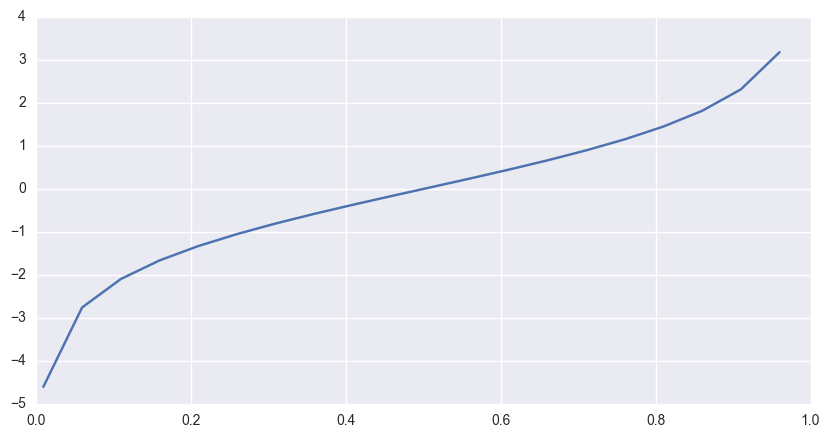

In [94]:
# Visualization of the ln(x/(1-x)) function:
x = np.arange(0.01,1,0.05)
y = np.log(x/(1-x))

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)

ax.plot(x,y)

#### Combine all the above to produce logit distribution

In [95]:
M = np.random.rand(256,40)
S = 16

In [180]:
def produceLogits(M, S):
    T = M.shape[0]
    
    subMatrices                   = []
    all_R_bar                     = []
    performance_degradation_R     = []
    performance_degradation_R_bar = []
    
    for i in range(int(T/S)):
        subMatrices.append(M[S*i:(S*i + int(S))])
    
    combinations = itertools.combinations(subMatrices, int(S/2))

    logits = []
    for J in combinations:
        J = np.array(J)
        J_bar = [x for x in subMatrices if x not in J]

        R = np.sum(np.sum(J,axis=1),axis=0)
        R_bar = np.sum(np.sum(J_bar,axis=1),axis=0)
        
        for r in R_bar:           
            all_R_bar.append(r)  # required for stochastic dominance
        
        n_star = np.where(R==np.max(R))
        ranks = R_bar.argsort().argsort()

        performance_degradation_R.append(np.max(R))               # required for Performance Degradation
        performance_degradation_R_bar.append(R_bar[n_star[0][0]]) # required for Performance Degradation
        
        N = subMatrices[0].shape[1]
        omega_bar = ranks[n_star[0][0]]/(N+1)

        logit = np.log(omega_bar/(1-omega_bar)) #division by zero!!! FIX!!!
        logits.append(logit)

    return logits, [performance_degradation_R,performance_degradation_R_bar, all_R_bar]

In [181]:
logits, [R, R_bar, all_R_bar] = produceLogits(M, S)

C:\Users\N.vavryk\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


In [182]:
logits = [x for x in logits if (x != -inf)]
logits = pd.DataFrame(data=logits,columns=['logits'])

In [183]:
PBO = len(logits.loc[logits.logits < 0])/len(logits.logits)

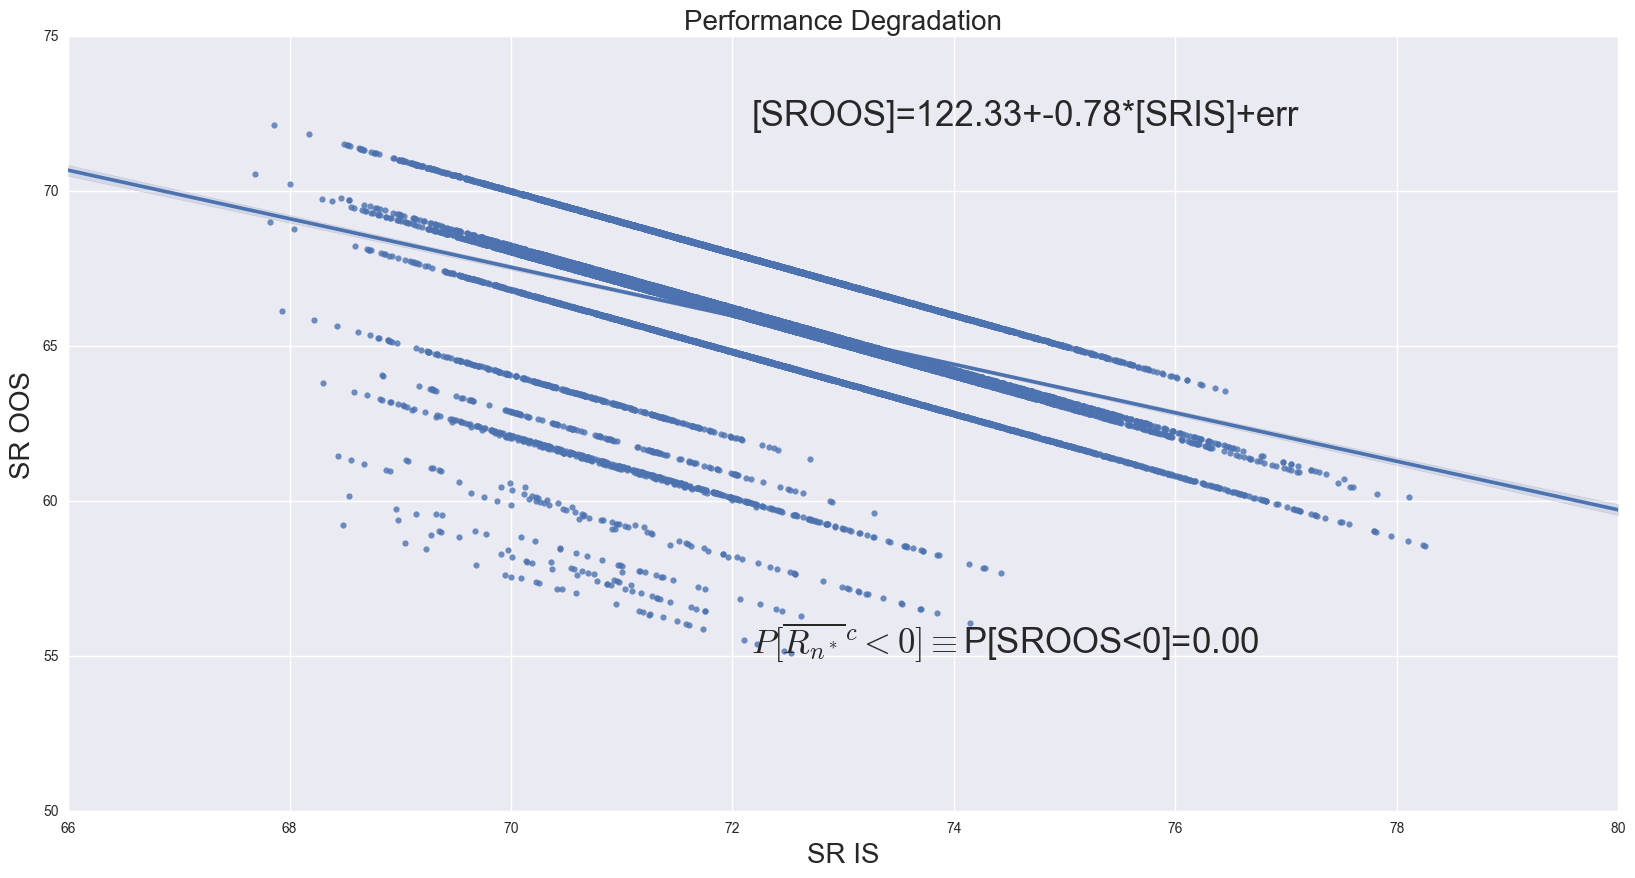

In [169]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)

p = sns.regplot(np.array(R),np.array(R_bar),ax=ax)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

ax.set_title('Performance Degradation', fontsize=20)
ax.set_xlabel('SR IS', fontsize=20)
ax.set_ylabel('SR OOS', fontsize=20)

formatter = '{0:.2f}'

ax.text(np.median(np.array(R)), np.max(np.array(R_bar)),r'[SROOS]='+formatter.format(intercept)+'+'+formatter.format(slope)+'*[SRIS]+err',fontsize=25)
ax.text(np.median(np.array(R)), np.min(np.array(R_bar)),r'$P[\overline{R_{n^*}}^c < 0]\equiv$P[SROOS<0]='+formatter.format(len(np.where(np.array(R_bar)<0)[0])/len(np.array(R_bar))),fontsize=25)

C:\Users\N.vavryk\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


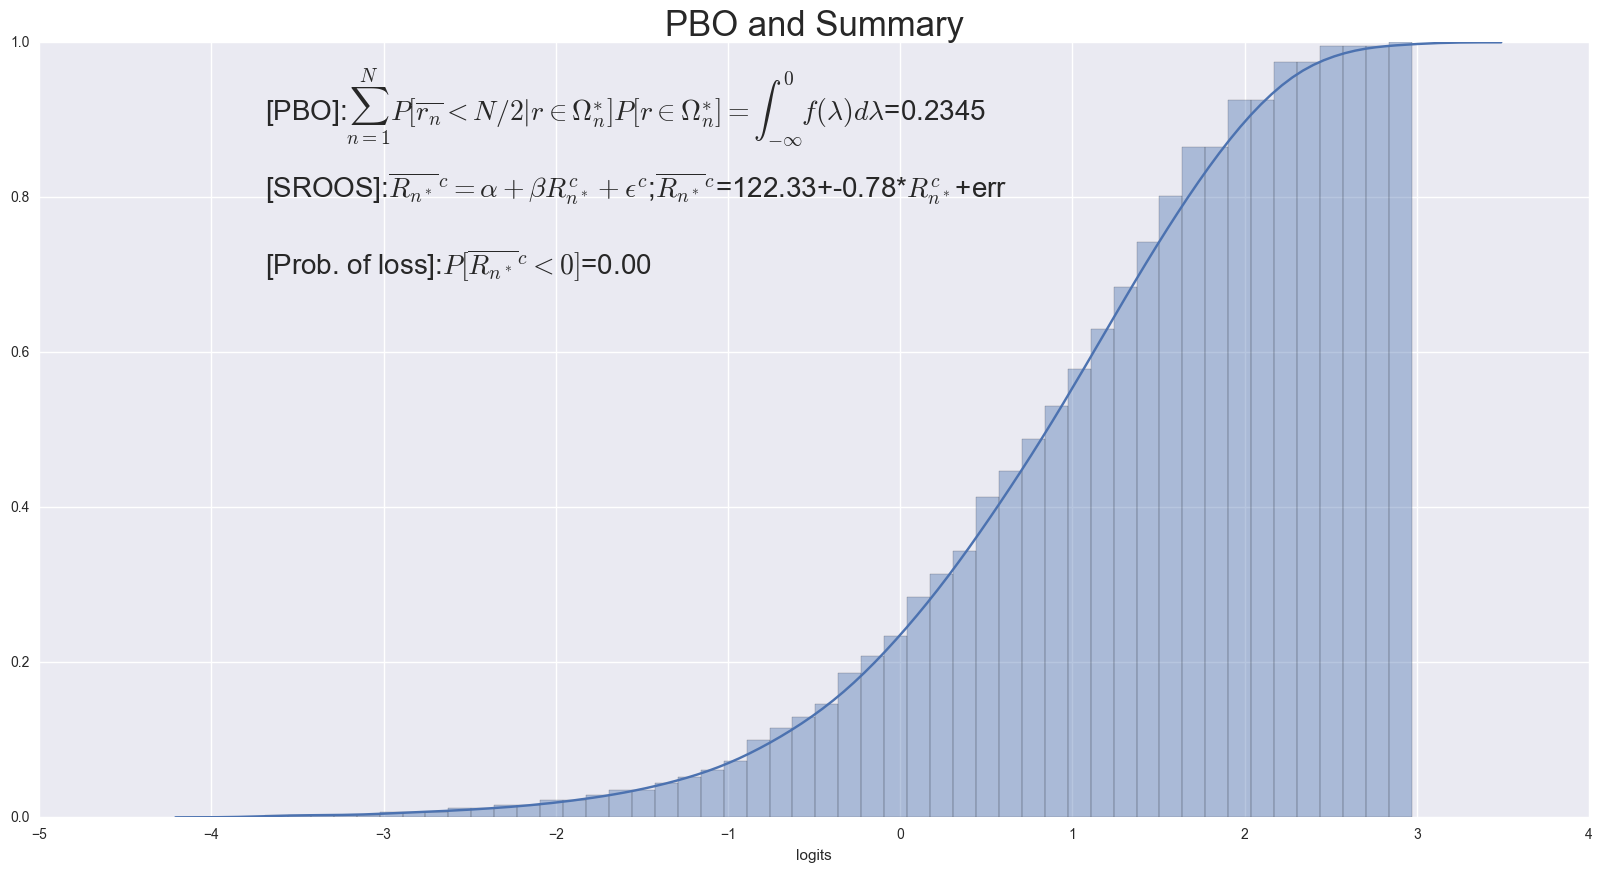

In [174]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)

minLogit = np.min(logits.logits)

sns.distplot(logits.logits, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True),ax=ax)
ax.text(minLogit, 0.9, '[PBO]:$\sum_{n=1}^N P[\overline{r_n} < N/2 | r \in \Omega^{*}_n] P[r \in \Omega^{*}_n]=\int_{-\infty}^{0}f(\lambda) d\lambda$=' + '{:.4f}'.format(PBO),fontsize=20)
ax.text(minLogit,0.8,'[SROOS]:'+'$\overline{R_{n^*}}^c = \\alpha + \\beta R^c_{n^*}+\\epsilon^c$;$\overline{R_{n^*}}^c$='+formatter.format(intercept)+'+'+formatter.format(slope)+'*$R^c_{n^*}$+err',fontsize=20)
ax.text(minLogit,0.7,'[Prob. of loss]:'+'$P[\overline{R_{n^*}}^c < 0]$='+formatter.format(len(np.where(np.array(R_bar)<0)[0])/len(np.array(R_bar))),fontsize=20)

ax.set_title('PBO and Summary',fontsize=25)

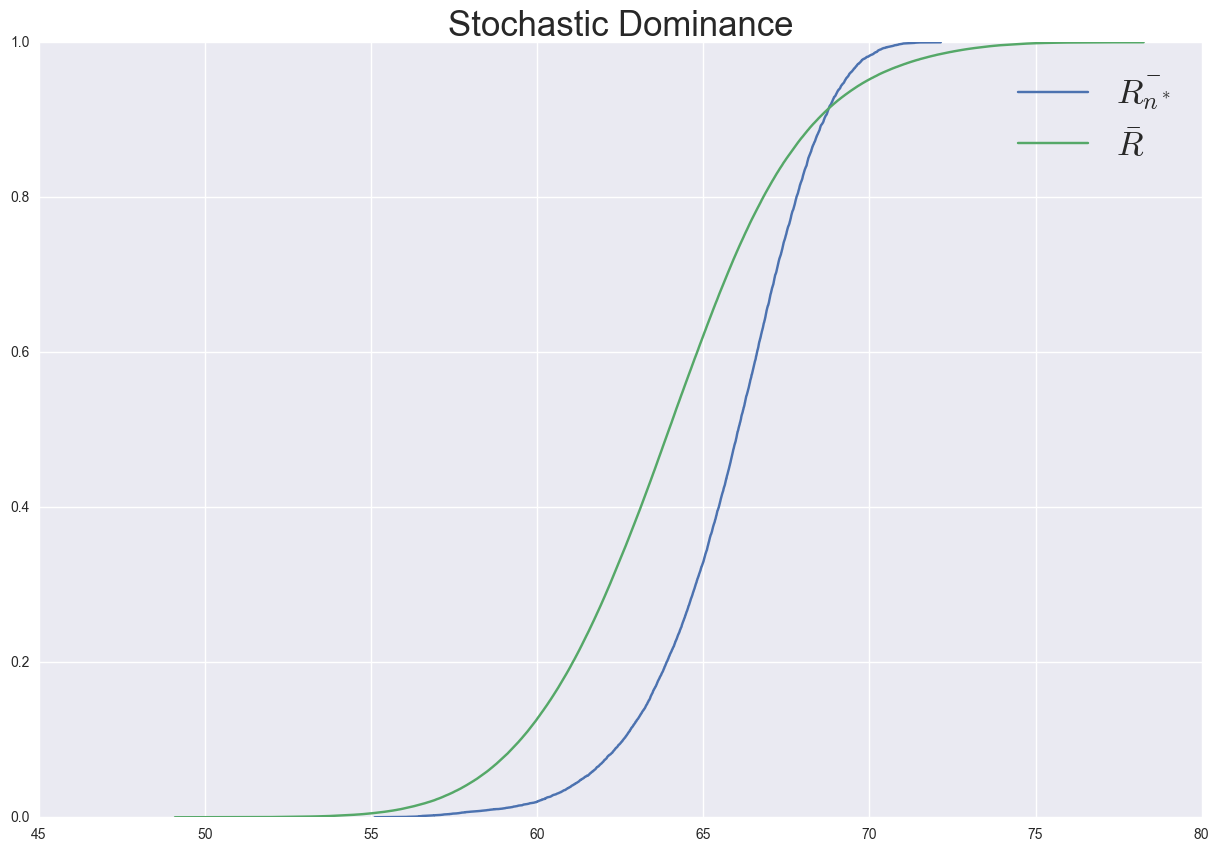

In [199]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

best_R = np.sort(np.array(R_bar))
cdf_1 = np.arange(len(best_R))/float(len(best_R))
ax.plot(best_R, cdf_1,label=r'$\bar{R_{n^*}}$')

all_R = np.sort(np.array(all_R_bar))
cdf_2 = np.arange(len(all_R_bar))/float(len(all_R_bar))
ax.plot(all_R, cdf_2,label=r'$\bar{R}$')

ax.set_title('Stochastic Dominance', fontsize=25)

plt.legend(fontsize=25)